In [2]:
import numpy as np

import librosa

import scipy.io.wavfile

import sinmf 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Compute a Spectrogram

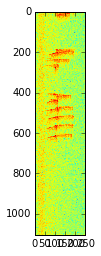

In [3]:
sr, x = scipy.io.wavfile.read('data/bird-songs.wav')
stft = librosa.stft(x, n_fft=1024, hop_length=200).T

X = np.abs(stft)[:,:250]

imshow(np.log(X))

### Decompose the Spectrogram

In [4]:
nmf = sinmf.SINMF(n_bases=5, window_width=5, n_iter=50)

%time A, D = nmf.fit(X)

CPU times: user 34.5 s, sys: 487 ms, total: 35 s
Wall time: 35 s


### Inspect Decomposition

In [5]:
X_bar = nmf.reconstruct(A, D)

#### Show the estimate

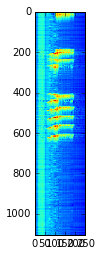

In [6]:
imshow(np.log(X_bar))

#### Show the activations

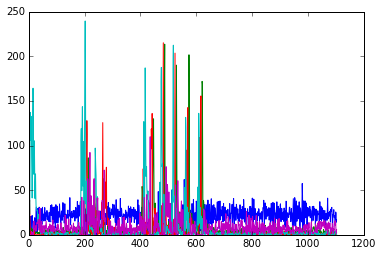

In [7]:
plot(A.T)

#### Show one of the basis windows


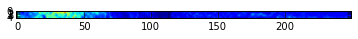

In [8]:
imshow(D[0])